# AI Community @ Семинар  №2
## Домашнее задание

### Теория

Ответы на задания этой секции можно описывать словами (нежелательно), писать в latex (рекомендуется) или рисовать и вставлять сюда фото (нежелательно).  
Создание новой ячейки под текущей - `b` на клавиатуре, когда вы не находитесь в режиме редактирования ячейки.  
Выйти из режима редактирования ячейки - `esc` на клавиатуре.

__Задание 1.__   
Доказать $(\pmb{AB})^{\top} = \pmb{B}^{\top}\pmb{A}^{\top}$.

__Определение.__ Матрица $\pmb{M}$ называется ортогональной, если выполняется следующее тождество:
$$
\pmb{M M}^\top = \pmb{M}^\top \pmb{M} = \pmb{I}
$$  
где $\pmb{I}$ - единичная матрица. Другими словами, для ортогональной матрицы верно:  
$$
\pmb{M}^{-1} = \pmb{M}^\top
$$

__Задание 2.__   
$\pmb{A}$ и $\pmb{B}$ ортогональны. Покажите равносильность всех следующих утверждений между собой:

1. $\pmb{AB} = \pmb{BA}$
2. $\pmb{A}^\top \pmb{B} = \pmb{BA}^\top$
3. $\pmb{AB}^\top = \pmb{B}^\top \pmb{A}$
4. $\pmb{A}^\top \pmb{B}^\top = \pmb{B}^\top \pmb{A}^\top$

Подсказка: утверждения равносильные, если от одного к другому можно перейти при помощи набора некоторых операций. Например, здесь можно перейти от первого ко второму, от второго к третьему, от третьего к четвертому и от четвертого к первому.

__Прошу прощения, в доказательствах и теории в целом я не силен :(__

---
### Практика

Ответами на задание этой секции мы ждем работающий код, решающий поставленную задачу.

In [302]:
import numpy as np

`np` - общепринятое сокращение для `numpy`. Советуем импортировать библиотеку `numpy` именно так.

__Задание 1.__ 

Дана следующая квадратная матрица:
$$\begin{pmatrix}
2 & -1 &  &  & 0 \\
-1 & 2 & -1 &  & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1\\
0& & & -1 & 2
\end{pmatrix}$$  
На главной диагонали значения равны `2`, на диагоналях на 1 выше и на 1 ниже значения равны `-1`. __Все__ остальные значения равны `0`.    
Необходимо создать такую матрицу с помощью `numpy` и без использования циклов.

In [303]:
def tridiagonal_matrix(n):
    A=np.eye(n,n,dtype='int')
    B=A.argmax(0)
    A.put((n*B+B+1)%(n*n),-1)
    A.put((n*B+B-1)%(n*n),-1)
    A.put((n*B+B)%(n*n),2)
    return A
    pass 
n=10
A=tridiagonal_matrix(n)
print(A)

[[ 2 -1  0  0  0  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0  0]
 [ 0  0 -1  2 -1  0  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0  0 -1  2 -1  0  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0  0  0 -1  2]]


__Задание 2.__

Посчитать [матрицу Гильберта](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%93%D0%B8%D0%BB%D1%8C%D0%B1%D0%B5%D1%80%D1%82%D0%B0) размера $n \times n$ без использования циклов.  
Подсказка: можно использовать функцию `np.fromfunction`.

In [305]:
def hilbert(n):
    A=np.zeros((n,n))
    B=np.arange(n*n)
    A.put(B,1/((B//n)+B%n+1))
    return A
    pass
A=hilbert(5)
print(A)

[[ 1.          0.5         0.33333333  0.25        0.2       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714]
 [ 0.25        0.2         0.16666667  0.14285714  0.125     ]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111]]


__Задание 3.__ 

Запишите и посчитайте с помощью numpy следующее выражение.  
Для вычисления `sin` от матрицы можно использовать функцию `np.sin`. Она применится к матрице поэлементно.   
  
$$
\sin{(
\begin{bmatrix}
3 & -6 \\
4 & -1 \\
-2 & 8
\end{bmatrix} - 
\begin{bmatrix}
4 & 5 \\
-5 & 8 \\
3 & 1
\end{bmatrix})  
}
\cdot
\begin{bmatrix}
7 & 3 & 6\\
5 & 8 & 4\\
\end{bmatrix}
\cdot
\begin{pmatrix}
3 \\
-2 \\
7 
\end{pmatrix}
$$

Ожидаемый результат:

$$
\begin{pmatrix}
-20.964 \\
12.363 \\
72.397
\end{pmatrix}
$$

In [306]:
A=np.array([[3,-6],[4,-1],[-2,8]])
B=np.array([[4,5],[-5,8],[3,1]])
A=A-B
A=np.sin(A)
B=np.array([[7,3,6],[5,8,4]])
C=np.array([[3],[-2],[7]])
A.dot(B).dot(C)


array([[-20.96411056],
       [ 12.36355456],
       [ 72.39732182]])

__Задание 4.__ 

In [307]:
from skimage.io import imread, imshow
%matplotlib inline

`imread` загружает изображение из файла.  
`imshow` показывает изображение под текущей ячейкой.  
`%matplotlib inline` позволяет отображать картинки прямо в Jupyter. Без этой строки картинок вы не увидите!

In [308]:
img = imread('data/lemur.jpg')

Нарисуйте черный квадрат на изображении `img` без использования циклов.

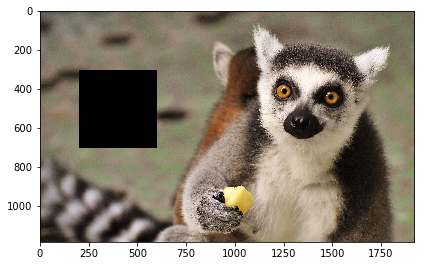

In [309]:
n=400
i=300
j=200
B=np.arange(n)
B=B+i
B=np.tile(B,n)
C=np.arange(n)
C=C+j
C=np.repeat(C,n)
cpy=img.copy()
cpy[B,C]=[0,0,0]
imshow(cpy)

__Задание 5*.__

Нарисуйте виньетку на изображении с лемуром (`img`), используя [функцию плотности двумерного нормального распредения](https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function). В других источниках эта функция называется гауссианой или ядром Гаусса.

Подсказки:
* Напишите функцию, которая вычисляет ядро Гаусса заданного размера `shape`:

```python
def gaussian(shape, mean_x, mean_y, sigma_x, sigma_y):
    '''
    @param: shape: 2d size of output kernel
    '''
    gauss_kernel = np.empty(shape)
    # ...
    pass
    
# gaussian(x, y, ...).shape == (n, m)
```

* Сгенерируйте ядро Гаусса с помощью указанной функции со средними значениями $mean_x=0$ и $mean_y=0$, затем нормируйте полученную матрицу, чтобы значения получились в диапазоне $[0, 1]$.
* Умножьте полученную матрицу на исходное изображение.
* Варьируйте значения $mean_x$ и $mean_y$ для получения наилучшего результата. Как сигмы можно взять следующие значения:  
$\sigma_x$ = `img.shape[0] // 2`, $\sigma_y$ = `img.shape[1] // 2`.

Ожидаемый результат должен выглядеть следующим образом:

![Лемур виньетка](data/lemur_vignette.png)

In [299]:
def gaussian(shape, mean_x, mean_y, sigma_x, sigma_y):
    mx=np.empty((shape))
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                mx[i][j][k]=np.exp(-((i-mean_x)**2/(2*(sigma_x**2))+(j-mean_y)**2/(2*(sigma_y**2))))
    return mx
    pass
sigma_x=img.shape[0]//2
sigma_y=img.shape[1]//2
mx=gaussian(img.shape,img.shape[0]-1,img.shape[1]-1,sigma_x,sigma_y)

In [300]:
cpy=img*mx
cpy=cpy.astype('int')

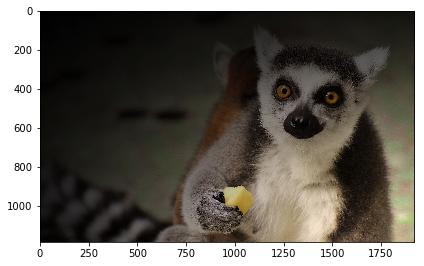

In [301]:
imshow(cpy/cpy.max())